### Data Wrangling

The raw output data from coregistration cannot be passed into machine learning model directly. So, we need to combine, filter, select and transform the raw data. The processed data will be saved in a csv file. The last colomn are the labels(assuming we are mainly doing classification here). The other columns are features. 

The data selection is highly related to the specific research. The ultimate goal is to identify the features which are most important to the formation of deposit. For example, some researchers might think the distance to subducting trench is important. Others might think the sea floor age is cirtical. Bring out your own hypothesis, wrangle the data accordingly and then send the data into machine learning model to be evaluated. Repeat this process until we find the most important featueres and then we can train the machine learning model to predict deposit formation on new dataset. 

In [2]:
import numpy as np

#load data from coregistration output folder
input_data = np.genfromtxt('coreg_output/coregistration_input_data_example.csv',delimiter=',')
conv_data=np.genfromtxt('coreg_output/0_vector_subStats.out',delimiter=',')
seafloor_age_data=np.genfromtxt(
    'coreg_output/0_grid_EarthByte_AREPS_v1.15_Muller_etal_2016_AgeGrid.out',delimiter=',')

#concatenate data together. The last column is the lables. 1 means deposit. 0 means non-deposit
#only the first 155 rows are deposits. 
data = np.c_[input_data, conv_data, seafloor_age_data, [1]*155+[0]*(len(input_data)-155)]

#print(np.isnan(conv_data).any(axis=1).sum())
all_non_nan_data = data[~np.isnan(data).any(axis=1)]#remove all the rows which contains nan

print(data.shape)
#print(data[:,-1].sum())

#the four features
#"Seafloor Age","Distance to Trench Edge","Convergence Rate", "Subduction Obliquity"
data = all_non_nan_data[:155*2,(31,19,8,9)]
labels = all_non_nan_data[:155*2,-1]
print(data.shape)
#print(labels)
np.savetxt('machine_learning_train_test_data.csv', np.c_[data, labels], delimiter=',')
print('The train and test data has been saved!')


(92540, 33)
(310, 4)
The train and test data has been saved!


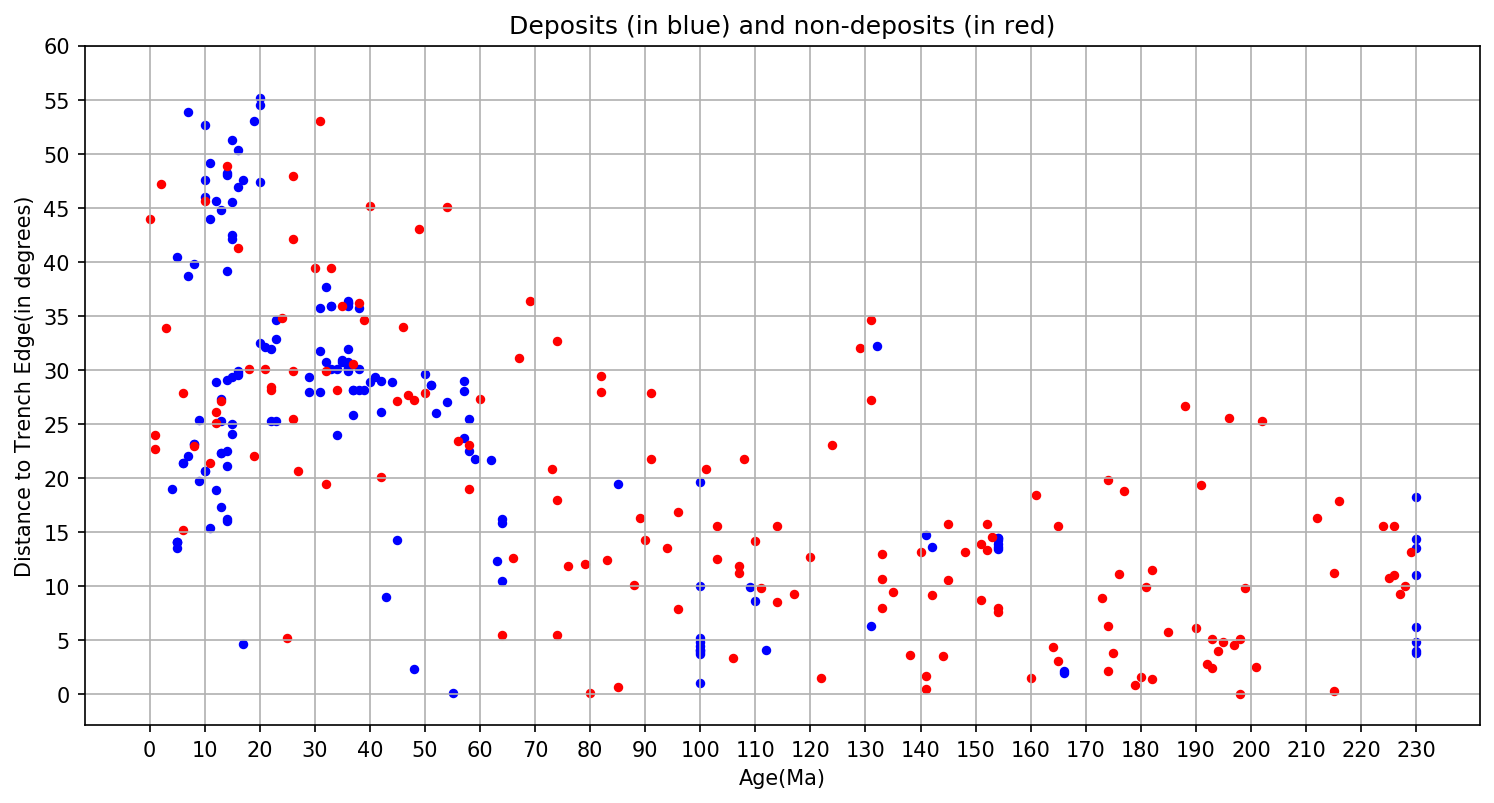

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,6),dpi=150)
ax = plt.axes()

ax.scatter(all_non_nan_data[:155,3], all_non_nan_data[:155,19], 50, marker='.',c='blue')
ax.scatter(all_non_nan_data[155:155*2,3], all_non_nan_data[155:155*2,19], 50, marker='.',c='red')
ax.set_xticks(np.arange(0,240,10))
ax.set_yticks(np.arange(0,65,5))
plt.xlabel('Age(Ma)')
plt.ylabel('Distance to Trench Edge(in degrees)')
plt.title('Deposits (in blue) and non-deposits (in red)')
plt.grid()
plt.show()
